# Week 19 Data Analysis Challege

https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv

1.    How many columns and rows are in the dataset?
2.    Is there any missing data?
3.    Display the summary statistics of the numeric columns using the describe method.
4.    Rename the following columns:
       -  coaster_name  ➡️  Coaster_Name
       - year_introduced ➡️ Year_Introduced
       - opening_date_clean ➡️ Opening_Date
       - speed_mph ➡️ Speed_mph
       - height_ft ➡️ Height_ft
       - Inversions_clean ➡️ Inversions
       - Gforce_clean ➡️ Gforce
5.    Are there any duplicated rows?
6.    What are the top 3 years with the most roller coasters introduced?
7.    What is the average speed? Also display a plot to show it's distribution.
8.    Explore the feature relationships. Are there any positively or negatively correlated relationships?
9.    Create your own question and answer it.

In [28]:
# Standard library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')

Numpy version 1.23.5
Pandas version 2.0.1


In [2]:
# import the data
df = pd.read_csv("https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv")

**1.    How many columns and rows are in the dataset?**

In [3]:
print(df.shape)
print(f'There are {len(df.columns)} columns and {len(df.index)} rows in the dataframe.')

(1087, 56)
There are 56 columns and 1087 rows in the dataframe.


**2. Is there any missing data?**

In [4]:
print(f'Yes, of the {1087*56} total cells, there are {df.isna().sum().sum()} missing entries.')

Yes, of the 60872 total cells, there are 29435 missing entries.


In [5]:
print('The missing data is in the following columns!\n')
print(df.isna().sum())

The missing data is in the following columns!

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Tra

**3. Display the summary statistics of the numeric columns using the describe method**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inversions,932.0,1.547210,2.114073,0.0000,0.00000,0.0000,3.0000,14.0000
year_introduced,1087.0,1994.986201,23.475248,1884.0000,1989.00000,2000.0000,2010.0000,2022.0000
latitude,812.0,38.373484,15.516596,-48.2617,35.03105,40.2898,44.7996,63.2309
longitude,812.0,-41.595373,72.285227,-123.0357,-84.55220,-76.6536,2.7781,153.4265
speed1_value,937.0,53.850374,23.385518,5.0000,40.00000,50.0000,63.0000,240.0000
speed_mph,937.0,48.617289,16.678031,5.0000,37.30000,49.7000,58.0000,149.1000
height_value,965.0,89.575171,136.246444,4.0000,44.00000,79.0000,113.0000,3937.0000
height_ft,171.0,101.996491,67.329092,13.1000,51.80000,91.2000,131.2000,377.3000
Inversions_clean,1087.0,1.326587,2.030854,0.0000,0.00000,0.0000,2.0000,14.0000
Gforce_clean,362.0,3.824006,0.989998,0.8000,3.40000,4.0000,4.5000,12.0000



4.    Rename the following columns:
       -  coaster_name  ➡️  Coaster_Name
       - year_introduced ➡️ Year_Introduced
       - opening_date_clean ➡️ Opening_Date
       - speed_mph ➡️ Speed_mph
       - height_ft ➡️ Height_ft
       - Inversions_clean ➡️ Inversions
       - Gforce_clean ➡️ Gforce


In [7]:
df.rename(columns={
    'coaster_name': 'Coaster_Name',
    'year_introduced': 'Year_Introduced',
    'opening_date_clean': 'Opening_Date',
    'speed_mph': 'Speed_mph',
    'height_ft': 'Height_ft',
    'Inversions_clean': 'Inversions',
    'Gforce_clean': 'Gforce'
}, inplace=True)

df.columns

Index(['Coaster_Name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main', 'Opening_Date',
       'speed1', 'speed2', 'speed1_value', 'speed1_unit', 'Speed_mph',
       'height_value', 'height_unit', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

**5.  Are there any duplicated rows?**

In [8]:
print(f'There are {df.duplicated().count()} rows in the dataframe.')


There are 1087 rows in the dataframe.


**6. What are the top 3 years with the most roller coasters introduced?**

In [9]:
df.groupby(['Year_Introduced']).count().sort_values(by=['Coaster_Name'], ascending=False).head(3)

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_mph,height_value,height_unit,Height_ft,Inversions,Gforce
Year_Introduced,,,,,,,,,,,,,,,,,,,,,
1999,49,44,44,49,39,35,49,48,39,38,...,44,44,44,44,44,45,45,1,49,18
2000,47,45,45,47,33,34,47,47,40,34,...,45,44,45,45,45,44,44,6,47,18
1998,32,28,29,32,25,24,32,31,28,22,...,29,29,29,29,29,30,30,2,32,14


Top three years are 1999, 2000, and 1998.

**7. What is the average speed? Also display a plot to show it's distribution.**

The average speed is 48.62 mph.


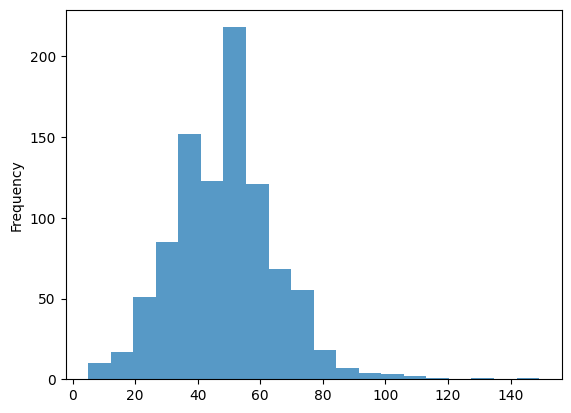

In [33]:
print(f"The average speed is {df['Speed_mph'].mean():.2f} mph.")
df['Speed_mph'].plot.hist(bins=20, alpha=0.75)
plt.show()

**8. Explore the feature relationships. Are there any positively or negatively correlated relationships?**

<Axes: >

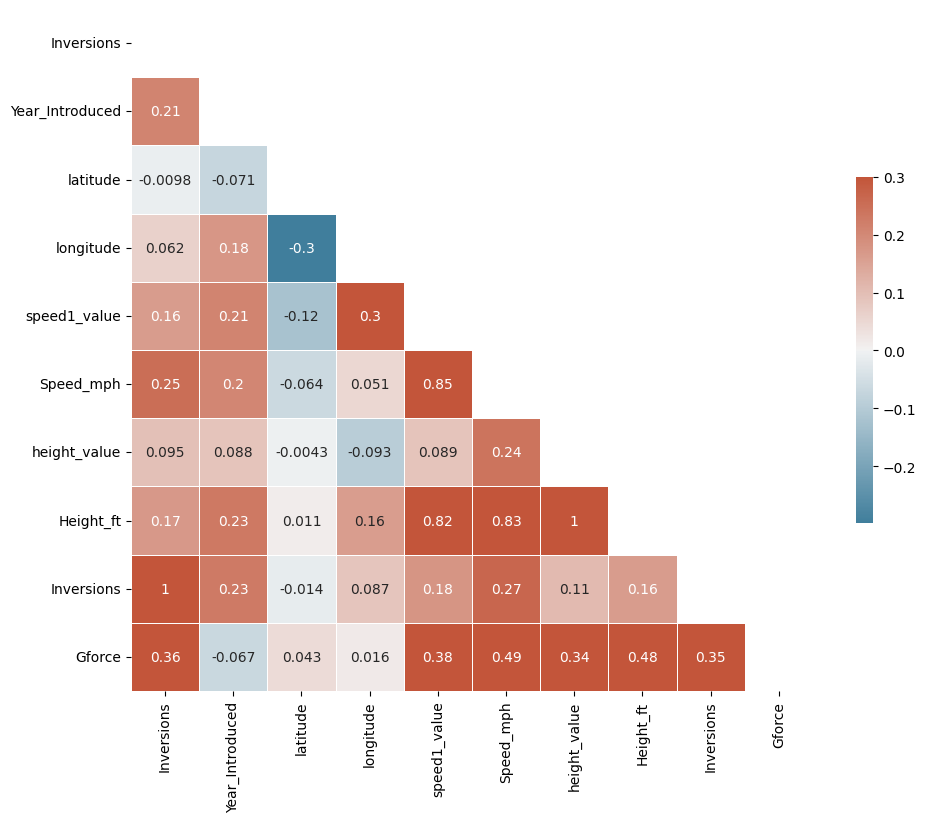

In [30]:
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

**9. Create your own question and answer it.**

In [34]:
# No